In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=816623f54baae79d6aad1b16bbe3f882


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barra do garcas
Processing Record 2 of Set 1 | ambon
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | burnie
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | sao joao do paraiso
Processing Record 11 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 1 | coquimbo
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | tacuati
Processing Record 16 of Set 1 | sambava
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | lukovetskiy
Processing Record 21 of Set 1 | ayk

Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | mananjary
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | capaci
Processing Record 46 of Set 4 | qaanaaq
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 50 of Set 4 | teya
Processing Record 1 of Set 5 | iskateley
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | toora-khem
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | norman wells
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | punta cardon
Processing Record 9 of Set 5 | tasiilaq
Processing Record 10 of Set 5 | svetlyy


Processing Record 29 of Set 8 | orumiyeh
Processing Record 30 of Set 8 | dumai
Processing Record 31 of Set 8 | stephenville
Processing Record 32 of Set 8 | katangli
Processing Record 33 of Set 8 | alice springs
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | jinxiang
Processing Record 36 of Set 8 | ostersund
Processing Record 37 of Set 8 | eldorado
Processing Record 38 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 39 of Set 8 | opobo
City not found. Skipping...
Processing Record 40 of Set 8 | dukat
Processing Record 41 of Set 8 | cockburn town
Processing Record 42 of Set 8 | roros
Processing Record 43 of Set 8 | agva
City not found. Skipping...
Processing Record 44 of Set 8 | mazyr
Processing Record 45 of Set 8 | porto novo
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | churachandpur
Processing Record 48 of Set 8 | santa cruz de la palma
Processing Record 49 of Set 8 | nadvoitsy
Processing Record 50 of Set 8 | kuch

Processing Record 13 of Set 12 | mastic beach
Processing Record 14 of Set 12 | thornbury
Processing Record 15 of Set 12 | oarja
Processing Record 16 of Set 12 | puerto baquerizo moreno
Processing Record 17 of Set 12 | hamilton
Processing Record 18 of Set 12 | paranga
Processing Record 19 of Set 12 | raudeberg
Processing Record 20 of Set 12 | ilmajoki
Processing Record 21 of Set 12 | shanghai
Processing Record 22 of Set 12 | vikarabad
Processing Record 23 of Set 12 | ladybrand
Processing Record 24 of Set 12 | belmonte
Processing Record 25 of Set 12 | mersing
Processing Record 26 of Set 12 | tymovskoye
Processing Record 27 of Set 12 | lasa
Processing Record 28 of Set 12 | general pico
Processing Record 29 of Set 12 | sunel
Processing Record 30 of Set 12 | kingaroy
Processing Record 31 of Set 12 | posse
Processing Record 32 of Set 12 | sokoni
Processing Record 33 of Set 12 | esna
Processing Record 34 of Set 12 | semporna
Processing Record 35 of Set 12 | salalah
Processing Record 36 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barra Do Garcas,-15.8900,-52.2567,91.40,58,40,3.69,BR,2021-04-03 18:48:03
1,Ambon,-3.6954,128.1814,81.68,79,83,6.69,ID,2021-04-03 18:48:03
2,New Norfolk,-42.7826,147.0587,59.00,51,40,17.27,AU,2021-04-03 18:48:04
3,Burnie,-41.0667,145.9167,56.08,78,5,10.22,AU,2021-04-03 18:48:04
4,Hasaki,35.7333,140.8333,57.99,88,0,4.61,JP,2021-04-03 18:48:04
5,Puerto Ayora,-0.7393,-90.3518,84.20,70,20,8.05,EC,2021-04-03 18:48:04
6,Sinnamary,5.3833,-52.9500,80.31,83,87,11.25,GF,2021-04-03 18:48:05
7,Mataura,-46.1927,168.8643,63.00,56,6,15.01,NZ,2021-04-03 18:48:05
8,Sao Joao Do Paraiso,-15.3136,-42.0144,80.78,56,99,6.31,BR,2021-04-03 18:48:05
9,Coquimbo,-29.9533,-71.3436,60.80,82,75,13.80,CL,2021-04-03 18:48:06


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barra Do Garcas,BR,2021-04-03 18:48:03,-15.8900,-52.2567,91.40,58,40,3.69
1,Ambon,ID,2021-04-03 18:48:03,-3.6954,128.1814,81.68,79,83,6.69
2,New Norfolk,AU,2021-04-03 18:48:04,-42.7826,147.0587,59.00,51,40,17.27
3,Burnie,AU,2021-04-03 18:48:04,-41.0667,145.9167,56.08,78,5,10.22
4,Hasaki,JP,2021-04-03 18:48:04,35.7333,140.8333,57.99,88,0,4.61
5,Puerto Ayora,EC,2021-04-03 18:48:04,-0.7393,-90.3518,84.20,70,20,8.05
6,Sinnamary,GF,2021-04-03 18:48:05,5.3833,-52.9500,80.31,83,87,11.25
7,Mataura,NZ,2021-04-03 18:48:05,-46.1927,168.8643,63.00,56,6,15.01
8,Sao Joao Do Paraiso,BR,2021-04-03 18:48:05,-15.3136,-42.0144,80.78,56,99,6.31
9,Coquimbo,CL,2021-04-03 18:48:06,-29.9533,-71.3436,60.80,82,75,13.80


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

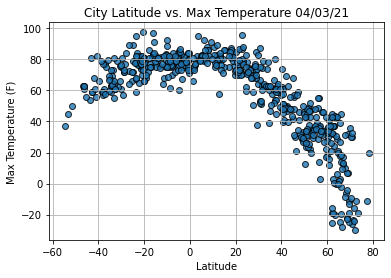

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

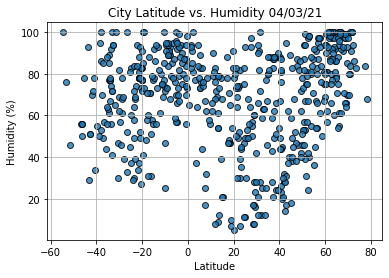

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

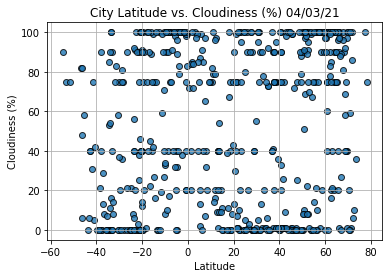

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

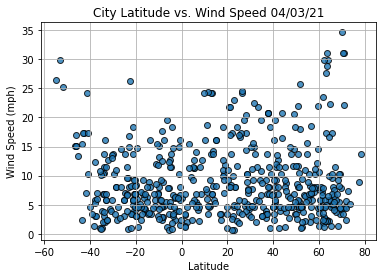

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()